In [26]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import ccf

load_dotenv()

True

# Importando os dados

Dados previamente tratados.
Foram importados 48 índices

In [3]:
# Carregar variáveis de ambiente
load_dotenv()

path_dados_tratados = os.getenv('PATH_DADOS_TRATADOS')

dados_indicadores = pd.read_csv(path_dados_tratados + "dados_indicadores_tratados.csv")
dados_indices = pd.read_csv(path_dados_tratados + "dados_indices.csv", sep=';')
dados_indices.drop(columns=['Unnamed: 0'], inplace=True)
preco_acoes = pd.read_csv(path_dados_tratados + 'preco_acoes.csv')

Como o foco deste estudo são as companhias de transmissão de energia elétrica, as seguintes empresas serão consideradas:
* ELET6 - CD_CVM = 2437
* ISAE4 - CD_CVM = 18376
* TAEE4 - CD_CVM = 20257
* ALUP4 - CD_CVM = 21490

In [4]:
lista = dados_indicadores['DENOM_CIA'].unique()
nome = [e for e in lista if 'alupar' in e.lower()]
dados_indicadores[['CD_CVM', 'DENOM_CIA']].query(f"DENOM_CIA == '{nome[0]}'")

,CD_CVM,DENOM_CIA
14297,21490,ALUPAR INVESTIMENTO S/A
14298,21490,ALUPAR INVESTIMENTO S/A
14299,21490,ALUPAR INVESTIMENTO S/A
14300,21490,ALUPAR INVESTIMENTO S/A
14301,21490,ALUPAR INVESTIMENTO S/A
14302,21490,ALUPAR INVESTIMENTO S/A
14303,21490,ALUPAR INVESTIMENTO S/A
14304,21490,ALUPAR INVESTIMENTO S/A
14305,21490,ALUPAR INVESTIMENTO S/A
14306,21490,ALUPAR INVESTIMENTO S/A


In [5]:
# Filtrar dataframe para possuir apenas os códigos 2437, 18376, 20257, 21490
dados_indicadores_transm = dados_indicadores[dados_indicadores['CD_CVM'].isin([2437, 18376, 20257, 21490])]

In [6]:
dados_indicadores_transm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 496 to 14353
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CD_CVM        234 non-null    int64  
 1   DENOM_CIA     234 non-null    object 
 2   DT_FIM_EXERC  234 non-null    object 
 3   3.01          234 non-null    float64
 4   3.02          234 non-null    float64
 5   3.03          234 non-null    float64
 6   3.04          234 non-null    float64
 7   3.05          234 non-null    float64
 8   3.06          234 non-null    float64
 9   3.07          234 non-null    float64
 10  3.08          234 non-null    float64
 11  3.09          234 non-null    float64
 12  3.10          234 non-null    float64
 13  3.11          234 non-null    float64
 14  3.12          0 non-null      float64
 15  3.13          0 non-null      float64
dtypes: float64(13), int64(1), object(2)
memory usage: 31.1+ KB


In [7]:
dados_indicadores_transm.drop(columns=['3.13', '3.12'], inplace=True)

C:\Users\giova\AppData\Local\Temp\ipykernel_192588\76046229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_indicadores_transm.drop(columns=['3.13', '3.12'], inplace=True)


# Padronização dos dados

In [8]:
# Após os imports, adicione esta célula:

def normalize_dataframe(df):
    """
    Z-score normalization para todas as colunas de um DataFrame.
    Retorna um novo DataFrame cujas colunas são (x - mean) / std.
    """
    return (df - df.mean()) / df.std()

In [9]:
indicadores_transm_norm = dados_indicadores_transm.copy()
indicadores_transm_norm.iloc[:,3:] = normalize_dataframe(dados_indicadores_transm.iloc[:,3:])

In [10]:
indices_norm = dados_indices.copy()
indices_norm.iloc[:,1:] = normalize_dataframe(dados_indices.iloc[:,1:])

In [11]:
indices_norm.describe()

,ibov,iee,selic,vix,igpm,ipca,incc,IPAOG-DI Ipa - todos os itens - Nro. Índice(1477007),INCC-Brasil-DI-Todos os itens(1464783),Indicador de Incerteza da Economia Brasil (IIE-Br)(1428452),...,Índice da Taxa de Câmbio Efetiva Real - (Real / Cesta de Moedas)(1003597),Juros EUA,Tbonds,Cotacao dolar,CDI,TJLP,Energia res,Energia ind,Energia comer,Divida/PIB
count,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,...,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01
mean,1.204310e-16,-2.258081e-17,1.618291e-16,-3.057818e-16,-8.585411e-17,2.766149e-16,-5.504072e-17,1.768830e-16,5.532298e-16,1.406596e-16,...,-1.277697e-15,1.655926e-16,9.032323e-17,-3.612929e-16,9.239314e-16,6.473165e-16,-8.768880e-16,1.768830e-15,-3.650564e-16,6.736608e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.330400e+00,-1.051371e+00,-2.167123e+00,-1.194340e+00,-2.720665e+00,-2.992903e+00,-1.135944e+00,-1.179892e+00,-1.443896e+00,-1.432215e+00,...,-1.891767e+00,-6.662678e-01,-2.147881e+00,-1.437651e+00,-2.161165e+00,-1.885714e+00,-1.741475e+00,-2.919302e+00,-2.275798e+00,-1.406794e+00
25%,-8.973952e-01,-8.971301e-01,-7.408764e-01,-6.364078e-01,-4.835655e-01,-7.131791e-01,-7.347861e-01,-7.698539e-01,-8.023151e-01,-6.980147e-01,...,-7.323931e-01,-6.412704e-01,-4.512244e-01,-9.508562e-01,-7.470394e-01,-9.906341e-01,-6.574427e-01,-8.523712e-01,-5.295491e-01,-1.025327e+00
50%,-3.556302e-01,-4.564323e-01,2.853542e-01,-2.618700e-01,8.807483e-03,-4.802758e-02,-3.645050e-01,-3.634645e-01,-1.194389e-01,-7.752212e-02,...,-1.324981e-01,-5.902759e-01,-6.730933e-02,-1.921528e-02,2.456330e-01,-1.175197e-01,-3.839528e-02,1.388290e-01,1.058933e-01,2.228166e-01
75%,8.857020e-01,1.100733e+00,7.996599e-01,1.946787e-01,3.723973e-01,6.583254e-01,1.716908e-01,9.535108e-01,6.068981e-01,3.616259e-01,...,6.380407e-01,3.116277e-01,7.583145e-01,1.049335e+00,7.879496e-01,9.697548e-01,6.331538e-01,6.685778e-01,6.695547e-01,9.324906e-01
max,1.946308e+00,1.860374e+00,1.333014e+00,4.492177e+00,3.267501e+00,2.585352e+00,2.973787e+00,1.900345e+00,1.969552e+00,4.713896e+00,...,2.527538e+00,2.495394e+00,1.885291e+00,1.516581e+00,1.340760e+00,1.529866e+00,2.583680e+00,2.595153e+00,2.263984e+00,1.464630e+00


In [12]:
print(f'Dataframe de indicadores possui tamanho de {len(indicadores_transm_norm.query("CD_CVM == 2437"))}')
print(f'Dataframe de índices possui tamanho de {len(indices_norm)}')

Dataframe de indicadores possui tamanho de 59
Dataframe de índices possui tamanho de 59


# Data exploratory
Visualização de dados

In [13]:
indices_norm.describe()

,ibov,iee,selic,vix,igpm,ipca,incc,IPAOG-DI Ipa - todos os itens - Nro. Índice(1477007),INCC-Brasil-DI-Todos os itens(1464783),Indicador de Incerteza da Economia Brasil (IIE-Br)(1428452),...,Índice da Taxa de Câmbio Efetiva Real - (Real / Cesta de Moedas)(1003597),Juros EUA,Tbonds,Cotacao dolar,CDI,TJLP,Energia res,Energia ind,Energia comer,Divida/PIB
count,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,...,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01
mean,1.204310e-16,-2.258081e-17,1.618291e-16,-3.057818e-16,-8.585411e-17,2.766149e-16,-5.504072e-17,1.768830e-16,5.532298e-16,1.406596e-16,...,-1.277697e-15,1.655926e-16,9.032323e-17,-3.612929e-16,9.239314e-16,6.473165e-16,-8.768880e-16,1.768830e-15,-3.650564e-16,6.736608e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.330400e+00,-1.051371e+00,-2.167123e+00,-1.194340e+00,-2.720665e+00,-2.992903e+00,-1.135944e+00,-1.179892e+00,-1.443896e+00,-1.432215e+00,...,-1.891767e+00,-6.662678e-01,-2.147881e+00,-1.437651e+00,-2.161165e+00,-1.885714e+00,-1.741475e+00,-2.919302e+00,-2.275798e+00,-1.406794e+00
25%,-8.973952e-01,-8.971301e-01,-7.408764e-01,-6.364078e-01,-4.835655e-01,-7.131791e-01,-7.347861e-01,-7.698539e-01,-8.023151e-01,-6.980147e-01,...,-7.323931e-01,-6.412704e-01,-4.512244e-01,-9.508562e-01,-7.470394e-01,-9.906341e-01,-6.574427e-01,-8.523712e-01,-5.295491e-01,-1.025327e+00
50%,-3.556302e-01,-4.564323e-01,2.853542e-01,-2.618700e-01,8.807483e-03,-4.802758e-02,-3.645050e-01,-3.634645e-01,-1.194389e-01,-7.752212e-02,...,-1.324981e-01,-5.902759e-01,-6.730933e-02,-1.921528e-02,2.456330e-01,-1.175197e-01,-3.839528e-02,1.388290e-01,1.058933e-01,2.228166e-01
75%,8.857020e-01,1.100733e+00,7.996599e-01,1.946787e-01,3.723973e-01,6.583254e-01,1.716908e-01,9.535108e-01,6.068981e-01,3.616259e-01,...,6.380407e-01,3.116277e-01,7.583145e-01,1.049335e+00,7.879496e-01,9.697548e-01,6.331538e-01,6.685778e-01,6.695547e-01,9.324906e-01
max,1.946308e+00,1.860374e+00,1.333014e+00,4.492177e+00,3.267501e+00,2.585352e+00,2.973787e+00,1.900345e+00,1.969552e+00,4.713896e+00,...,2.527538e+00,2.495394e+00,1.885291e+00,1.516581e+00,1.340760e+00,1.529866e+00,2.583680e+00,2.595153e+00,2.263984e+00,1.464630e+00


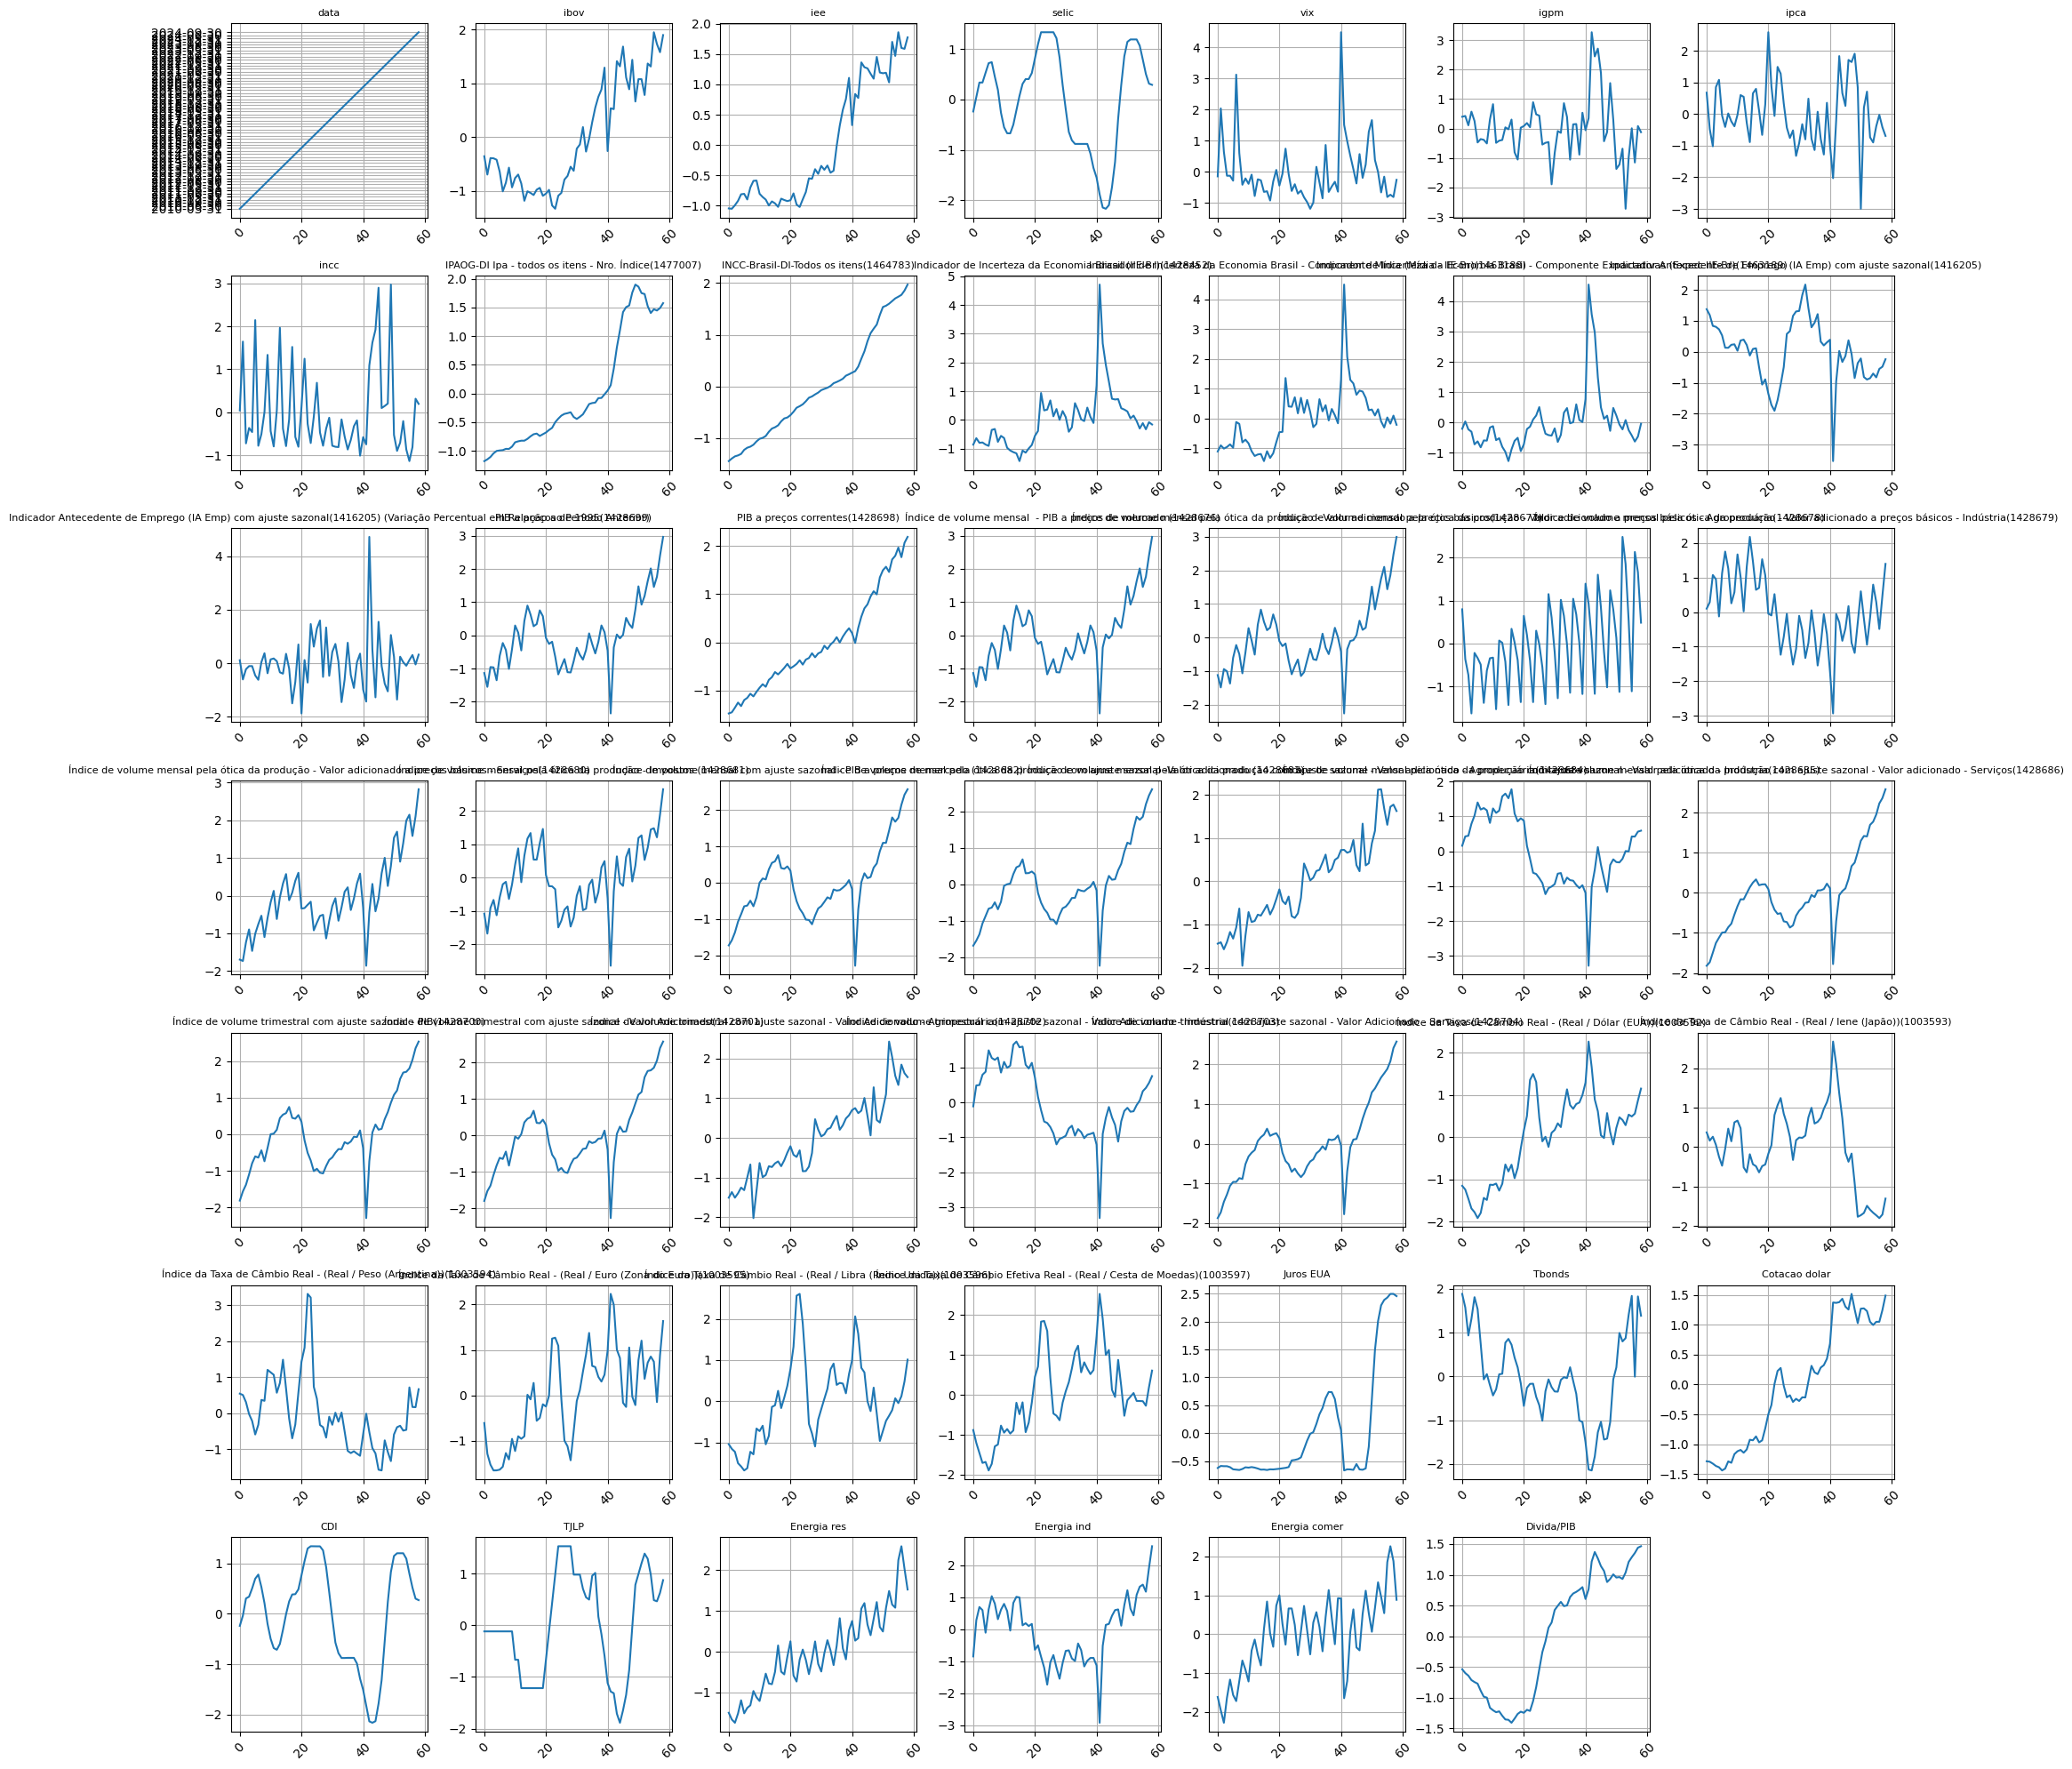

In [15]:
import matplotlib.pyplot as plt

# Supondo que indices_norm tenha 49 colunas (7x7)
fig, axes = plt.subplots(7, 7, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(indices_norm.columns):
    axes[i].plot(indices_norm[col])
    axes[i].set_title(col, fontsize=8)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(True)

# Remove eixos não usados (caso tenha menos de 49 colunas)
for j in range(len(indices_norm.columns), 49):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
#realizar uma correlação cruzada entre todos as colunas
indices_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 48 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   data                                                                                                                        59 non-null     object 
 1   ibov                                                                                                                        59 non-null     float64
 2   iee                                                                                                                         59 non-null     float64
 3   selic                                                                                                                       59 

In [24]:
from statsmodels.tsa.stattools import adfuller

adf_results = {}
stationary_cols = []

for col in indices_norm.iloc[:,1:].columns:
    serie = indices_norm[col].dropna()
    stationary = False
    p_value = None
    diff_count = 0
    max_diff = 2  # até duas diferenciações

    # Teste ADF até 2 diferenciações
    while not stationary and diff_count <= max_diff:
        result = adfuller(serie)
        p_value = result[1]
        stationary = p_value < 0.05
        if not stationary:
            serie = serie.diff().dropna()
            diff_count += 1

    # Armazena os resultados
    adf_results[col] = {
        'adf_statistic': result[0],
        'p_value': p_value,
        'stationary': stationary,
        'diff_count': diff_count
    }
    if stationary:
        stationary_cols.append(col)
    else:
        print(f"Atenção: {col} não ficou estacionária após {max_diff} diferenciações.")

# Exibir resultados
for col, res in adf_results.items():
    print(f"{col}: p-value={res['p_value']:.4f} | Stationary: {res['stationary']} | Diffs: {res['diff_count']}")

# DataFrame apenas com as séries estacionárias (originais ou diferenciadas)
indices_norm_estac = indices_norm[stationary_cols]

ibov: p-value=0.0000 | Stationary: True | Diffs: 1
iee: p-value=0.0000 | Stationary: True | Diffs: 1
selic: p-value=0.0037 | Stationary: True | Diffs: 1
vix: p-value=0.0000 | Stationary: True | Diffs: 0
igpm: p-value=0.0067 | Stationary: True | Diffs: 0
ipca: p-value=0.0246 | Stationary: True | Diffs: 0
incc: p-value=0.0003 | Stationary: True | Diffs: 1
IPAOG-DI Ipa - todos os itens - Nro. Índice(1477007): p-value=0.0221 | Stationary: True | Diffs: 1
INCC-Brasil-DI-Todos os itens(1464783): p-value=0.0000 | Stationary: True | Diffs: 2
Indicador de Incerteza da Economia Brasil (IIE-Br)(1428452): p-value=0.0000 | Stationary: True | Diffs: 1
Indicador de Incerteza da Economia Brasil - Componente Mídia (Mídia - IIE-Br)(1463188): p-value=0.0392 | Stationary: True | Diffs: 0
Indicador de Incerteza da Economia Brasil - Componente Expactativas (Expec IIE-Br)(1463189): p-value=0.0404 | Stationary: True | Diffs: 0
Indicador Antecedente de Emprego (IA Emp) com ajuste sazonal(1416205): p-value=0.03

In [25]:
indices_norm_estac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 47 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   ibov                                                                                                                        59 non-null     float64
 1   iee                                                                                                                         59 non-null     float64
 2   selic                                                                                                                       59 non-null     float64
 3   vix                                                                                                                         59 

Correlação cruzada entre os índices 

In [29]:
# Calcular a Função de Correlação Cruzada (CCF) entre todas as colunas de indices_norm_estac
ccf_dict = {}
columns = indices_norm_estac.columns

# Número de observações para o cálculo do intervalo de confiança
n_obs = len(indices_norm_estac)
# Intervalo de confiança (aproximado) de 95%
conf_interval = 1.96 / np.sqrt(n_obs)

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col_x = columns[i]
        col_y = columns[j]
        serie_x = indices_norm_estac[col_x].dropna()
        serie_y = indices_norm_estac[col_y].dropna()
        min_len = min(len(serie_x), len(serie_y))
        # Garantir mesmo tamanho
        serie_x = serie_x.iloc[:min_len]
        serie_y = serie_y.iloc[:min_len]
        ccf_result = ccf(serie_x, serie_y, adjusted=False)
        ccf_dict[(col_x, col_y)] = ccf_result

        # Exemplo de plot para cada par (opcional, pode comentar se não quiser muitos gráficos)
        # plt.figure(figsize=(10, 4))
        # plt.stem(range(len(ccf_result)), ccf_result, use_line_collection=True)
        # plt.title(f'CCF: {col_x} vs {col_y}')
        # plt.axhline(conf_interval, color='red', linestyle='--', label='Intervalo de Confiança (95%)')
        # plt.axhline(-conf_interval, color='red', linestyle='--')
        # plt.xlabel('Lags')
        # plt.ylabel('Correlação Cruzada')
        # plt.show()
        

In [30]:
# Verificar se os valores de CCF são maiores que o intervalo de confiança
pares_significativos = {}

for par, ccf_result in ccf_dict.items():
    # Verifica se algum valor da CCF excede o intervalo de confiança (positivo ou negativo)
    significativos = np.where(np.abs(ccf_result) > conf_interval)[0]
    if len(significativos) > 0:
        pares_significativos[par] = ccf_result[significativos]
        print(f"{par}: Lags significativos encontrados nos índices {significativos}, valores: {ccf_result[significativos]}")

('ibov', 'iee'): Lags significativos encontrados nos índices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45], valores: [ 0.96373405  0.90041782  0.86953464  0.81748645  0.7757528   0.7461007
  0.70637563  0.67700086  0.62029543  0.58582384  0.52948231  0.47389295
  0.428949    0.37105166  0.30764251 -0.26207969 -0.27886563 -0.30232405
 -0.32463014 -0.34671    -0.36995459 -0.38464744 -0.39020004 -0.39031759
 -0.39237885 -0.38239932 -0.37339422 -0.36571087 -0.35107911 -0.33092896
 -0.33829254 -0.33591506 -0.32492311 -0.29909687 -0.27534641]
('ibov', 'selic'): Lags significativos encontrados nos índices [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 29 30 31], valores: [-0.29745039 -0.30847392 -0.3109917  -0.30682298 -0.30521644 -0.30871695
 -0.31977191 -0.33976068 -0.36034358 -0.38561501 -0.41250268 -0.43158677
 -0.43540508 -0.4083515  -0.36212339 -0.294257    0.26483649  0.27599623
  0.26711603]
('ibov', 'vix'): Lags signific

Correlação cruzada entre os índices e indicadores

O foco de predição será nos indicadores:
* 3.01 (Receitas de venda de Bens e/ou Serviços)
* 3.02 (Custo dos Bens e/ou Serviços)
* 3.11 (Lucro ou Prejuízo consolidado do Período)

In [34]:
dados_indicadores_transm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 496 to 14353
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CD_CVM        234 non-null    int64  
 1   DENOM_CIA     234 non-null    object 
 2   DT_FIM_EXERC  234 non-null    object 
 3   3.01          234 non-null    float64
 4   3.02          234 non-null    float64
 5   3.03          234 non-null    float64
 6   3.04          234 non-null    float64
 7   3.05          234 non-null    float64
 8   3.06          234 non-null    float64
 9   3.07          234 non-null    float64
 10  3.08          234 non-null    float64
 11  3.09          234 non-null    float64
 12  3.10          234 non-null    float64
 13  3.11          234 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 27.4+ KB


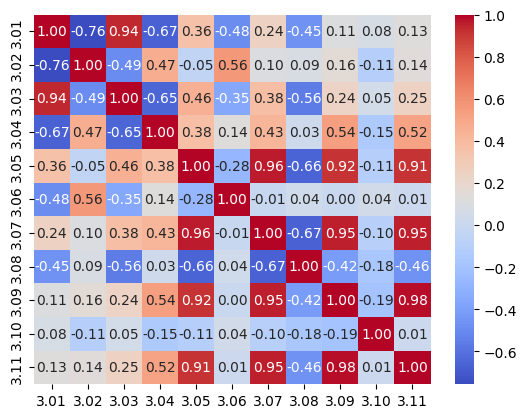

In [32]:
#realizar a correlação entre os indicadores do dataframe dados_indicadores_transm
correlacao = dados_indicadores_transm.iloc[:,3:].corr()
heatmap = sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm')

# Montando dataframes de indicadores específicos

In [69]:
def criar_dataframe_indicador(df, coluna_valor):
    """
    Cria um dataframe pivotado onde a coluna 'DT_FIM_EXERC' é o índice
    e cada coluna corresponde ao valor da coluna especificada (coluna_valor)
    de cada empresa (CD_CVM).

    Parâmetros:
      df: DataFrame original com as colunas 'CD_CVM', 'DT_FIM_EXERC' e a coluna desejada.
      coluna_valor: Nome da coluna que será utilizada para os valores (ex.: 'Resultado Bruto').

    Retorna:
      Um DataFrame pivotado.
    """
    resultado = pd.DataFrame()
    for cd_cvm in df['CD_CVM'].unique():
        df_temp = df.loc[df['CD_CVM'] == cd_cvm, ['DT_FIM_EXERC', coluna_valor]].copy()
        df_temp = df_temp.rename(columns={coluna_valor: cd_cvm})
        df_temp = df_temp.set_index('DT_FIM_EXERC')
        if resultado.empty:
            resultado = df_temp.copy()
        else:
            resultado = resultado.join(df_temp, how='outer')
    
    #Deixar tamanho padronizado em 59
    resultado = resultado[:-1]

    # Preencher valores NaN com 0
    resultado.fillna(0, inplace=True)
    
    return resultado

In [70]:
resultado_bruto = criar_dataframe_indicador(dados_indicadores_transm, '3.01')
lucro_consolidado = criar_dataframe_indicador(dados_indicadores_transm, '3.11')
despesas_operacionais = criar_dataframe_indicador(dados_indicadores_transm, '3.04')

In [71]:
resultado_bruto

,2437,18376,20257,21490
DT_FIM_EXERC,,,,
2010-03-31,6.159172e+09,4.474020e+08,1.652870e+08,2.820830e+08
2010-06-30,6.585996e+09,5.030820e+08,1.649740e+08,0.000000e+00
2010-09-30,6.999764e+09,6.207080e+08,2.982970e+08,2.681520e+08
2010-12-31,1.006972e+10,6.850940e+08,1.700360e+08,3.854960e+08
2011-03-31,8.551982e+09,6.070390e+08,1.579460e+08,2.933890e+08
2011-06-30,5.867031e+09,6.907350e+08,1.623650e+08,0.000000e+00
2011-09-30,7.097198e+09,8.965330e+08,4.780610e+08,3.222410e+08
2011-12-31,1.154514e+10,7.064980e+08,1.988720e+08,5.980150e+08
2012-03-31,9.270930e+09,6.513780e+08,2.343770e+08,2.962510e+08


Teste de estacionariedade KPSS
-   **Hipótese Nula (H0)**: A série é estacionária.
-   **Hipótese Alternativa (Ha)**: A série não é estacionária.

Teste de estacionariedade ADF
-   **Hipótese Nula (H0)**: A série não é estacionária.
-   **Hipótese Alternativa (Ha)**: A série é estacionária.

obs: utilizando dois métodos distintos para confirmar a estacionariedade

In [72]:
from statsmodels.tsa.stattools import adfuller, kpss

In [73]:
def teste_dados_estacionarios(series):
    dados_estacionarios_kpss = {}
    dados_estacionarios_adf = {}
    for cd_cvm, serie in series.items():
        print(cd_cvm)
        kpss_stat, p_value, lags, critical_values = kpss(serie)
        
        print(f'Estatística do teste: {kpss_stat:.4f}')
        print(f'p-valor: {p_value:.4f}')
        print('Valores Críticos:')
        for key, value in critical_values.items():
            print(f'{key}: {value:.4f}')
        print('Resultado:')
        if p_value > 0.05:
            #dados_estacionarios_kpss[cd_cvm] = p_value
            dados_estacionarios_kpss[cd_cvm] = 'S'
        else:
            #dados_estacionarios_kpss[cd_cvm] = p_value
            dados_estacionarios_kpss[cd_cvm] = 'N'

        adf_result = adfuller(serie)

        print('ADF Statistic: %f' % adf_result[0])
        print('p-value: %f' % adf_result[1])
        # Optionally, inspect the critical values
        for key, value in adf_result[4].items():
            print(f'Critical Value ({key}): {value:.4f}')

        if adf_result[1] < 0.05:
            #dados_estacionarios_adf[cd_cvm] = adf_result[1]
            dados_estacionarios_adf[cd_cvm] = 'N'
        else:
            dados_estacionarios_adf[cd_cvm] = 'S'

        df_dados_estacionarios_KPSS = pd.DataFrame.from_dict(dados_estacionarios_kpss, orient='index', columns=['KPSS'])
        df_dados_estacionarios_ADF = pd.DataFrame.from_dict(dados_estacionarios_adf, orient='index', columns=['ADF'])
        
    return df_dados_estacionarios_KPSS.join(df_dados_estacionarios_ADF)


In [74]:
resultado_bruto_estacionariedade = teste_dados_estacionarios(resultado_bruto)
lucro_consolidado_estacionariedade = teste_dados_estacionarios(lucro_consolidado)
despesas_operacionais_estacionariedade = teste_dados_estacionarios(despesas_operacionais)

2437
Estatística do teste: 0.0747
p-valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -7.285242
p-value: 0.000000
Critical Value (1%): -3.5507
Critical Value (5%): -2.9138
Critical Value (10%): -2.5946
18376
Estatística do teste: 0.7248
p-valor: 0.0113
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -6.663698
p-value: 0.000000
Critical Value (1%): -3.5507
Critical Value (5%): -2.9138
Critical Value (10%): -2.5946
20257
Estatística do teste: 0.9542
p-valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -0.982178
p-value: 0.759709
Critical Value (1%): -3.5553
Critical Value (5%): -2.9157
Critical Value (10%): -2.5957
21490
Estatística do teste: 0.8366
p-valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
Resultado:
ADF Statistic: -2.223970
p-value: 0.197661
Critical Value (1%): -3.5507
Critical Value (5%): -2.9138

C:\Users\giova\AppData\Local\Temp\ipykernel_192588\1895746674.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(serie)
C:\Users\giova\AppData\Local\Temp\ipykernel_192588\1895746674.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(serie)
C:\Users\giova\AppData\Local\Temp\ipykernel_192588\1895746674.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, critical_values = kpss(serie)
C:\Users\giova\AppData\Local\Temp\ipykernel_192588\1895746674.py:6: InterpolationWarning: The test statistic is outside o

Para os dados não estacionários, encontrar o componente integrativo do modelo

In [75]:
def separar_dados_estacionarios(df_estacionariedade, series):
    """
    Separa os dados estacionários e não estacionários de um DataFrame.
    
    Parâmetros:
      df: DataFrame com os resultados dos testes de estacionariedade.
      
    Retorna:
      Dois DataFrames: um com dados estacionários e outro com dados não estacionários.
    """
    df_estacionarios = df_estacionariedade.query('KPSS == "S" and ADF == "S" ')
    df_nao_estacionarios = df_estacionariedade.query('KPSS == "N" or ADF == "N" ')
    
    lista_estacionarios = df_estacionarios.index.tolist()
    lista_nao_estacionarios = df_nao_estacionarios.index.tolist()

    series_estacionarios = series[lista_estacionarios]
    series_nao_estacionarios = series[lista_nao_estacionarios]

    return series_estacionarios, series_nao_estacionarios

Iniciar fluxo de dados estacionários

In [76]:
# Filtrar o dataframe resultado_bruto usando esses valores (como nomes das colunas)
resultado_bruto_estacionario, resultado_bruto_nao_estacionario = separar_dados_estacionarios(resultado_bruto_estacionariedade, resultado_bruto)
lucro_consolidado_estacionario, lucro_consolidado_nao_estacionario = separar_dados_estacionarios(lucro_consolidado_estacionariedade, lucro_consolidado)
despesas_operacionais_estacionario, despesas_operacionais_nao_estacionario = separar_dados_estacionarios(despesas_operacionais_estacionariedade, despesas_operacionais)



In [77]:
resultado_bruto_nao_estacionario.columns
resultado_bruto_estacionario.columns

Index([], dtype='int64')

In [78]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def nivel_integracao(series):

    integration_level = {}  # Will store the integration order for each series
    series_corrigido = pd.DataFrame()

    for col in series.columns:
        serie = series[col]
        
        # Apply first-order differencing
        diff1 = serie.diff().dropna()
        adf_result1 = adfuller(diff1)
        
        if adf_result1[1] < 0.05:
            integration_level[col] = 1  # Series became stationary after 1st diff.
            series[col] = diff1
            print(f'{col}: Estacionário depois da primeira diferenciação (I=1)')
        else:
            # Aplicar diferenciação de segunda ordem
            diff2 = diff1.diff().dropna()
            adf_result2 = adfuller(diff2)
            integration_level[col] = 2  # Even after 1st diff, not stationary; use 2nd diff.
            series[col] = diff2
            print(f'{col}: Estaionário depois da segunda diferenciação (I=2) -- p-value: {adf_result2[1]:.4f}')

    print("\nIntegration levels:", integration_level)
    df_integration_level = pd.DataFrame.from_dict(integration_level, orient='index', columns=['Integration Level'])
    return df_integration_level

In [79]:
nivel_int_resultado_bruto = nivel_integracao(resultado_bruto_nao_estacionario)
nivel_int_lucro_consolidado = nivel_integracao(lucro_consolidado_nao_estacionario)
nivel_int_despesas_operacionais = nivel_integracao(despesas_operacionais_nao_estacionario)

2437: Estacionário depois da primeira diferenciação (I=1)
18376: Estacionário depois da primeira diferenciação (I=1)
20257: Estacionário depois da primeira diferenciação (I=1)
21490: Estacionário depois da primeira diferenciação (I=1)

Integration levels: {2437: 1, 18376: 1, 20257: 1, 21490: 1}
2437: Estacionário depois da primeira diferenciação (I=1)
18376: Estacionário depois da primeira diferenciação (I=1)
20257: Estacionário depois da primeira diferenciação (I=1)
21490: Estacionário depois da primeira diferenciação (I=1)

Integration levels: {2437: 1, 18376: 1, 20257: 1, 21490: 1}
2437: Estacionário depois da primeira diferenciação (I=1)
18376: Estacionário depois da primeira diferenciação (I=1)
20257: Estacionário depois da primeira diferenciação (I=1)
21490: Estaionário depois da segunda diferenciação (I=2) -- p-value: 0.0018

Integration levels: {2437: 1, 18376: 1, 20257: 1, 21490: 2}


Analise ACF e PACF para séries estacionárias - fluxo para dados estacionarios

Algoritmo

In [93]:
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA

In [88]:
def analisar_componentes_arima(serie, nlags=10, alpha=0.05):
    """
    Analisa os componentes AR e MA de uma série temporal.

    Parâmetros:
    - serie: pandas Series ou array-like com a série temporal estacionária.
    - nlags: número de lags para avaliar.
    - alpha: nível de significância (default = 5%).

    Retorna:
    - Um dicionário com a conclusão sobre os componentes AR (p) e MA (q).
    """
    
    # Calcular ACF e PACF com intervalos de confiança
    acf_values, acf_interval = acf(serie, nlags=nlags, alpha=alpha)
    # Calcular ACF e PACF com intervalos de confiança
    pacf_values, pacf_interval= pacf(serie, nlags=nlags, alpha=alpha)

    N = len(serie)
    z = norm.ppf(1 - alpha/2)  # por exemplo, 1.96 para 95% de confiança
    
    # Inicializa o array dos intervalos de confiança
    ci_acf = np.zeros((nlags+1, 2))
    ci_pacf = np.zeros((nlags+1, 2))
    
    # Para o lag zero, o ACF é 1 e não calculamos intervalo (ou pode ser [0,0])
    ci_acf[0] = [0, 0]
    ci_pacf[0] = [0, 0]
    
    # Calcula os intervalos para cada lag > 0 usando a fórmula de Bartlett
    for k in range(1, nlags+1):
        var = (1.0 / N) * (1 + 2 * np.sum( acf_values[1:k]**2 ))
        margin = z * np.sqrt(var)
        ci_acf[k] = [-margin, margin]

        # Calcula os intervalos para cada lag > 0 usando a fórmula de Bartlett
    for k in range(1, nlags+1):
        var = (1.0 / N) * (1 + 2 * np.sum( pacf_values[1:k]**2 ))
        margin = z * np.sqrt(var)
        ci_pacf[k] = [-margin, margin]
        
    # Função auxiliar para determinar o maior lag significativo
    def obter_ordem(values, confint):
        ordem = 0
        for lag in range(1, len(values)):  # Ignora lag 0
            if (values[lag] < confint[lag][0]) or (values[lag] > confint[lag][1]):
                ordem = lag
            else:
                # Se o primeiro não significativo aparecer, interrompe
                break
        return ordem

    # Determinar p e q
    #print("Valores ACF:", acf_values)
    #print("Valores PACF:", pacf_values)
    #print("Intervalos de Confiança ACF:", ci_acf)
    #print("Intervalos de Confiança PACF:", ci_pacf)
    p = obter_ordem(pacf_values, ci_pacf)
    q = obter_ordem(acf_values, ci_acf)

    # Construir conclusão
    conclusao = {
        'AR (p)': p,
        'MA (q)': q,
        'Interpretacao': f"O modelo sugerido é ARIMA({p}, d, {q}), onde d é definido pela análise de estacionariedade."
    }

    return p, q, conclusao


Montando variações de ARIMA para cada empresa

In [89]:
def componentes_arima(serie_temporal, nivel_int_serie):
    resultados = []
    for cd_cvm, series in serie_temporal.items():
        p,q, retorno = analisar_componentes_arima(series)
       # print(f'CD_CVM: {cd_cvm}')
       # print(f'AR(p): {p}, MA(q): {q}')
        serie_temporal_arima_dict = {}
        serie_temporal_arima_dict['CD_CVM'] = cd_cvm
        
        serie_temporal_arima = pd.DataFrame()
        if p == 0 and q == 0:
            #print('Setando p=1 para existir pelo menos um modelo AR')
            p = 1 
            q = 1
        resultados.append({
            'CD_CVM': cd_cvm,
            'AR(p)': p,
            'MA(q)': q
        })

    df_componentes = pd.DataFrame(resultados).set_index('CD_CVM')

    #Juntando componente integrativo com os componentes AR e MA
    df_componentes_arima = pd.concat([nivel_int_serie, df_componentes], axis=1)
    df_componentes_arima.columns = ['I(d)', 'AR(p)', 'MA(q)']
    df_componentes_arima.fillna(0, inplace=True)
    df_componentes_arima['I(d)'] = df_componentes_arima['I(d)'].astype(int)
    print(df_componentes_arima)
    return df_componentes_arima

In [90]:
def gera_modelo_arima(serie_temporal, df_componentes):
    # Dicionário para armazenar os modelos ajustados para cada CD_CVM
    modelos_arima = {}

    for cd_cvm in df_componentes.index:
        # Split dos dados em treino/validação e teste
        n = len(serie_temporal)
        split_point = int(n * 0.8) 

        p = df_componentes.loc[cd_cvm, 'AR(p)']
        q = df_componentes.loc[cd_cvm, 'MA(q)']
        i = df_componentes.loc[cd_cvm, 'I(d)']
        # Como as séries já são estacionárias, definimos d = 0
        order = (p, i, q)

        serie = serie_temporal[cd_cvm].iloc[:split_point]
        
        try:
            modelo = ARIMA(serie, order=order).fit()
            modelos_arima[cd_cvm] = modelo
            print(f'Modelo ARIMA({p}, {i}, {q}) para CD_CVM {cd_cvm} ajustado com sucesso.')
            print(modelo.summary())
        except Exception as e:
            print(f'Erro ao ajustar modelo para CD_CVM {cd_cvm}: {str(e)}')

    return modelos_arima

In [91]:
def adicionar_lags(df, lags=4):
    frames = df.copy()  # copia do DataFrame original
    for lag in range(1, lags + 1):
        lagged = df.shift(lag).copy()
        lagged.columns = [f"{col}_lag{lag}" for col in df.columns]
        frames = pd.concat([frames, lagged], axis=1)
    return frames

In [94]:
resultado_bruto_comp_arima = componentes_arima(resultado_bruto, nivel_int_resultado_bruto)
lucro_consolidado_comp_arima = componentes_arima(lucro_consolidado, nivel_int_lucro_consolidado)
despesas_operacionais_comp_arima = componentes_arima(despesas_operacionais, nivel_int_despesas_operacionais)

       I(d)  AR(p)  MA(q)
2437      1      1      1
18376     1      1      1
20257     1      1      4
21490     1      1      5
       I(d)  AR(p)  MA(q)
2437      1      1      1
18376     1      1      1
20257     1      1      4
21490     1      1      5
       I(d)  AR(p)  MA(q)
2437      1      1      1
18376     1      1      1
20257     1      1      4
21490     2      1      1


In [116]:
#aplicar normalização Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Normalizar as variáveis exógenas
# resultado_bruto_normalizado = pd.DataFrame(scaler.fit_transform(resultado_bruto), columns=resultado_bruto.columns, index=resultado_bruto.index)
# lucro_consolidado_normalizado = pd.DataFrame(scaler.fit_transform(lucro_consolidado), columns=resultado_bruto.columns, index=resultado_bruto.index)
# despesas_operacionais_normalizado = pd.DataFrame(scaler.fit_transform(despesas_operacionais), columns=resultado_bruto.columns, index=resultado_bruto.index)

# Normalizar as variáveis exógenas com z-score
resultado_bruto_normalizado = normalize_dataframe(resultado_bruto)
lucro_consolidado_normalizado = normalize_dataframe(lucro_consolidado)
despesas_operacionais_normalizado = normalize_dataframe(despesas_operacionais)

In [117]:
result_bruto_arima = gera_modelo_arima(resultado_bruto_normalizado, resultado_bruto_comp_arima)
lucro_consolidado_arima = gera_modelo_arima(lucro_consolidado_normalizado, lucro_consolidado_comp_arima)
despesas_operacionais_arima = gera_modelo_arima(despesas_operacionais_normalizado, despesas_operacionais_comp_arima)

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Modelo ARIMA(1, 1, 1) para CD_CVM 2437 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                   2437   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -70.703
Date:                Wed, 27 Aug 2025   AIC                            147.406
Time:                        09:08:45   BIC                            152.826
Sample:                    03-31-2010   HQIC                           149.426
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0370      0.458      0.081      0.936      -0.860       0.934
ma.L1         -0.9994      7.583     -0.132      0.895     -15.862    

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Modelo ARIMA(1, 1, 5) para CD_CVM 21490 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                  21490   No. Observations:                   46
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 -28.231
Date:                Wed, 27 Aug 2025   AIC                             70.463
Time:                        09:08:45   BIC                             83.109
Sample:                    03-31-2010   HQIC                            75.177
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7904      0.238     -3.320      0.001      -1.257      -0.324
ma.L1          0.4102      1.932      0.212      0.832      -3.376   

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Modelo ARIMA(1, 1, 5) para CD_CVM 21490 ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                  21490   No. Observations:                   46
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 -47.695
Date:                Wed, 27 Aug 2025   AIC                            109.391
Time:                        09:08:45   BIC                            122.037
Sample:                    03-31-2010   HQIC                           114.105
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8511      0.395     -2.156      0.031      -1.625      -0.077
ma.L1          0.0383      8.651      0.004      0.996     -16.917   

In [118]:
def aplica_modelo_forecast(result_bruto_arima, resultado_bruto, exog_dict):
    """
    Aplica o modelo ARIMA ajustado para prever os próximos valores da série temporal.
    
    Parâmetros:
      resultados_arima: Dicionário com os modelos ARIMA ajustados.
      resultado_bruto: DataFrame com os dados originais para prever.
      
    Retorna:
      Um dicionário com as previsões para cada CD_CVM.
    """
    forecast_results = {}
    metrics = []
    exog_vars = None
    for cd_cvm, model in result_bruto_arima.items():
        n = len(resultado_bruto[cd_cvm])
        split_point = int(n * 0.8)  # 80% dos dados para treino
        test = resultado_bruto.iloc[split_point:]  # Test set é a última parte da série
        steps = len(test)  # horizonte de previsão igual ao tamanho do conjunto de teste
        
        try:
            forecast = model.forecast(steps=steps)
            forecast_results[cd_cvm] = forecast
            actual = resultado_bruto[cd_cvm].iloc[split_point:]
        except Exception as e:
            n = len(exog_dict[cd_cvm])
            split_point = int(n * 0.8)  # 80% dos dados para treino
            test = resultado_bruto.iloc[split_point+4:]  # Test set é a última parte da série
            steps = len(test)  # horizonte de previsão igual ao tamanho do conjunto de teste
            exog_forecast = exog_dict[cd_cvm].iloc[split_point:]
            forecast = model.forecast(steps=steps, exog=exog_forecast)
            forecast_results[cd_cvm] = forecast
            print(f'Previsão para CD_CVM {cd_cvm} concluída.')
            actual = resultado_bruto[cd_cvm].iloc[split_point+4:]
        
        
        #Plotar os resultados

        plt.figure(figsize=(10, 5))
        plt.plot(actual.index, actual, label='Actual', color='blue')
        plt.plot(actual.index, forecast, label='Forecast', color='orange')
        plt.title(f'Forecast vs Real - CD_CVM {cd_cvm}')
        plt.xlabel('Data')
        plt.xticks(rotation=45)
        plt.ylabel(f'Resultado Bruto Normalizado')
        plt.legend()
        plt.show()
        rmse = np.sqrt(np.mean((actual.values - forecast.values) ** 2))
        print(f'RMSE para CD_CVM {cd_cvm}: {rmse}')
        mae = np.mean(np.abs(actual.values - forecast.values))
        metrics.append({'CD_CVM': cd_cvm, 'RMSE': rmse, 'MAE': mae})
    
    print(metrics)
    df_metrics = pd.DataFrame(metrics).set_index('CD_CVM')
    return df_metrics

In [119]:
result_bruto_arima

{2437: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x27e18fa33d0>,
 18376: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x27e1fb5add0>,
 20257: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x27e20d923d0>,
 21490: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x27e20ba0410>}

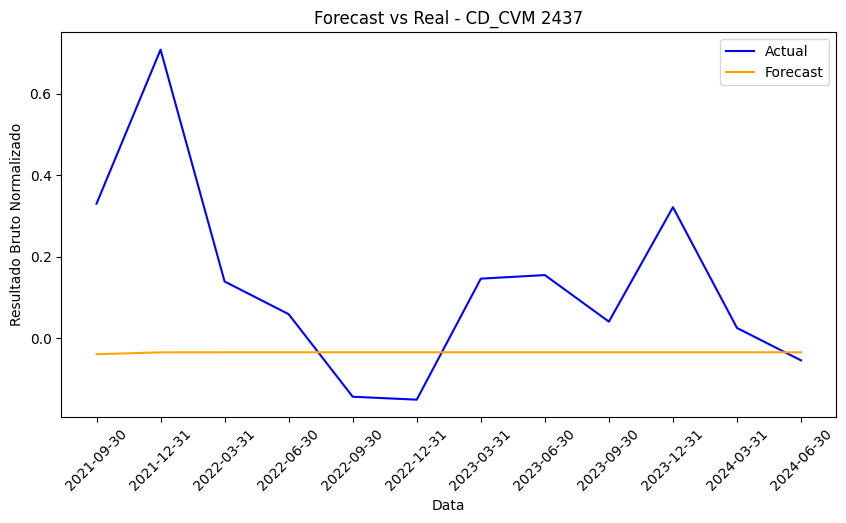

RMSE para CD_CVM 2437: 0.2826075754263417


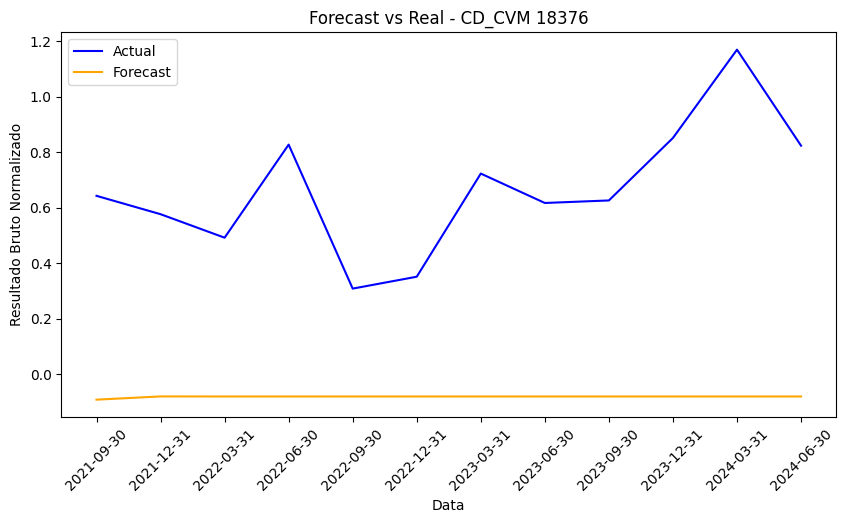

RMSE para CD_CVM 18376: 0.7823879673574022


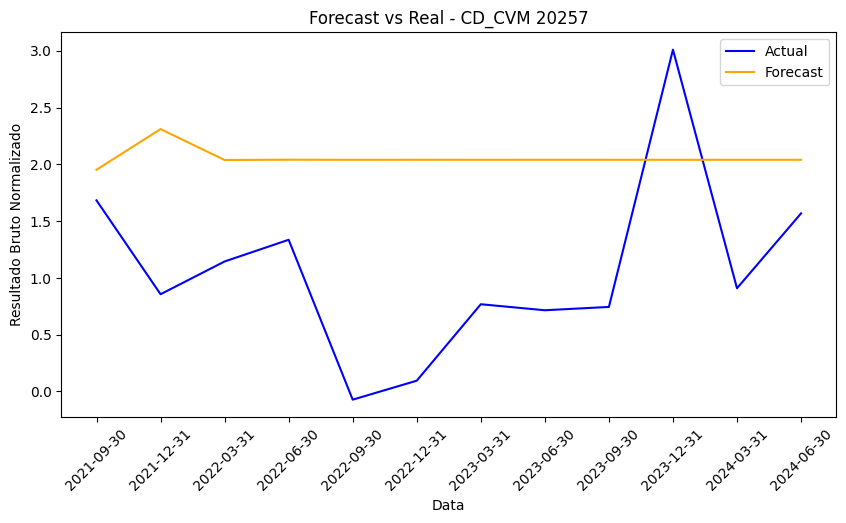

RMSE para CD_CVM 20257: 1.26627630146773


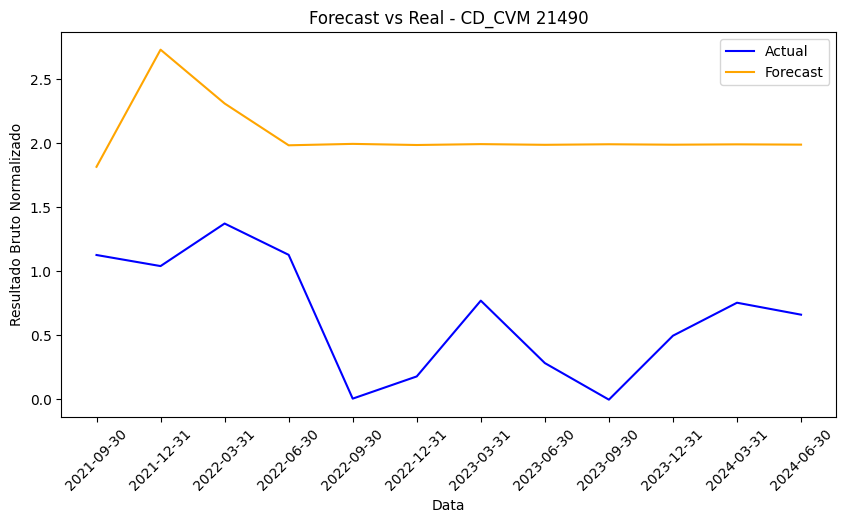

RMSE para CD_CVM 21490: 1.4727012878361714
[{'CD_CVM': 2437, 'RMSE': 0.2826075754263417, 'MAE': 0.20724583230428642}, {'CD_CVM': 18376, 'RMSE': 0.7823879673574022, 'MAE': 0.7490890563463649}, {'CD_CVM': 20257, 'RMSE': 1.26627630146773, 'MAE': 1.1543556267357238}, {'CD_CVM': 21490, 'RMSE': 1.4727012878361714, 'MAE': 1.4112380888562637}]


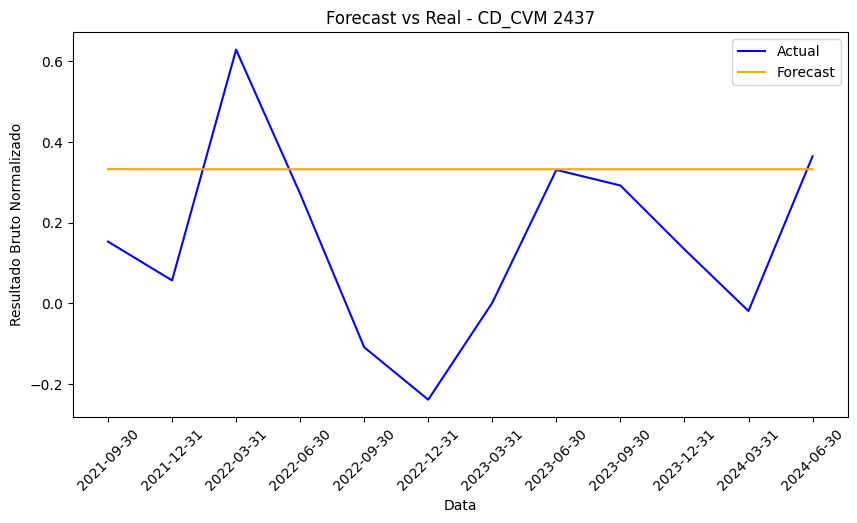

RMSE para CD_CVM 2437: 0.28801382313781165


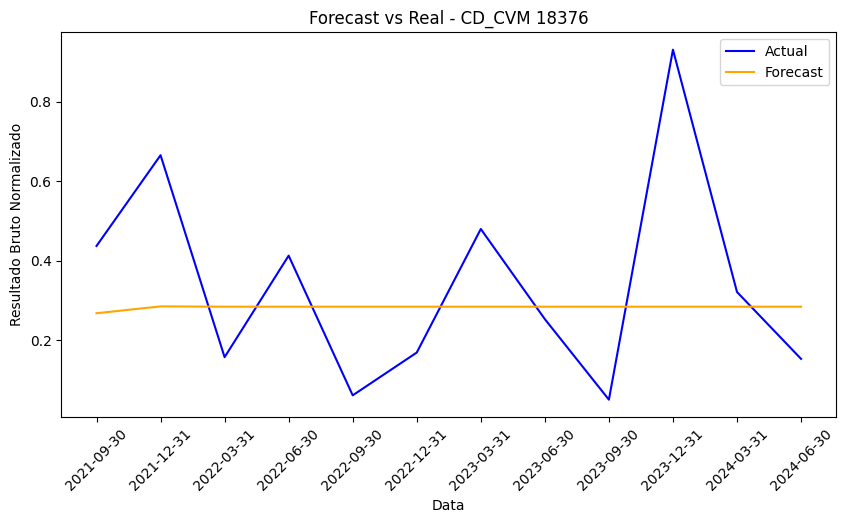

RMSE para CD_CVM 18376: 0.2578925750234688


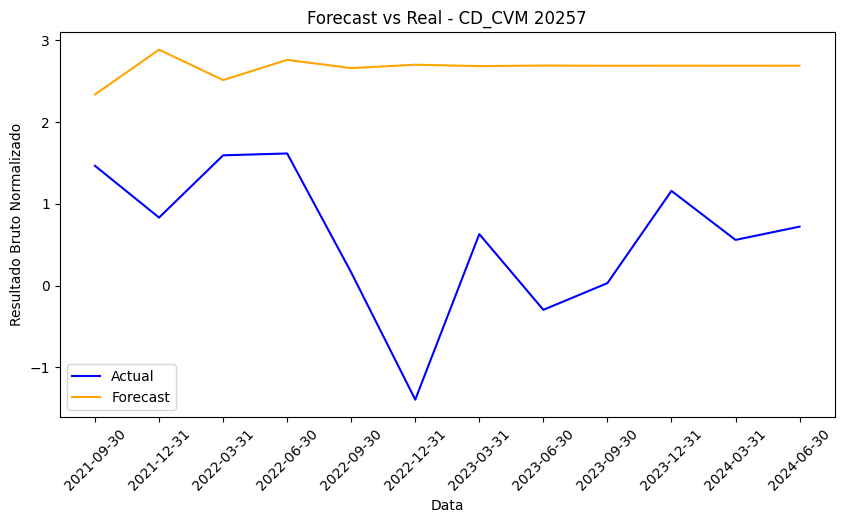

RMSE para CD_CVM 20257: 2.257790967619674


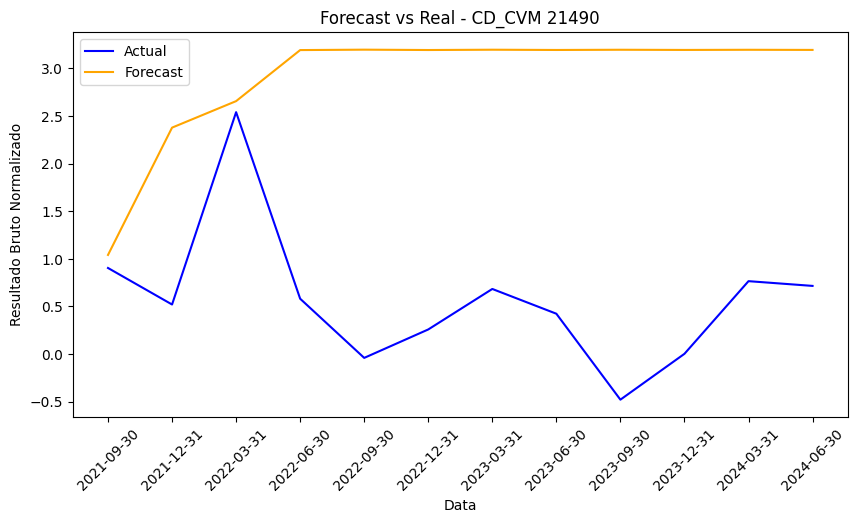

RMSE para CD_CVM 21490: 2.5682863880846067
[{'CD_CVM': 2437, 'RMSE': 0.28801382313781165, 'MAE': 0.2315825726536127}, {'CD_CVM': 18376, 'RMSE': 0.2578925750234688, 'MAE': 0.2013861542557368}, {'CD_CVM': 20257, 'RMSE': 2.257790967619674, 'MAE': 2.077073391453851}, {'CD_CVM': 21490, 'RMSE': 2.5682863880846067, 'MAE': 2.3297955664233183}]


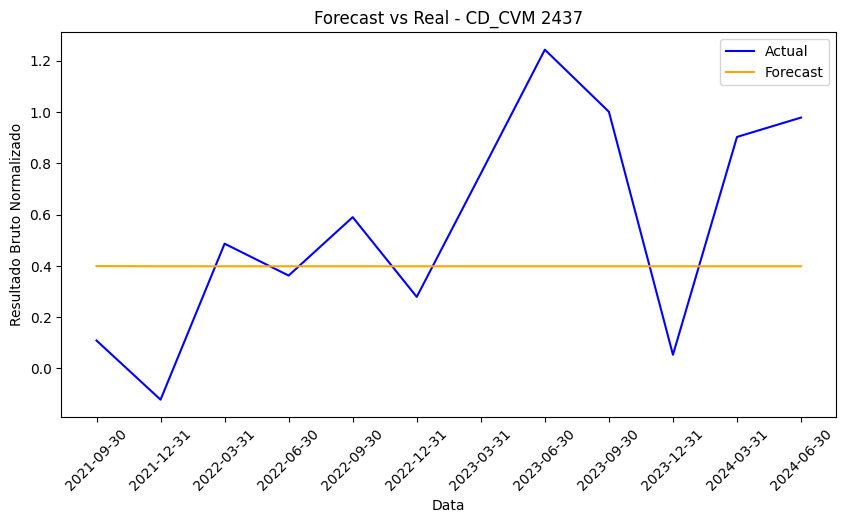

RMSE para CD_CVM 2437: 0.441052620160528


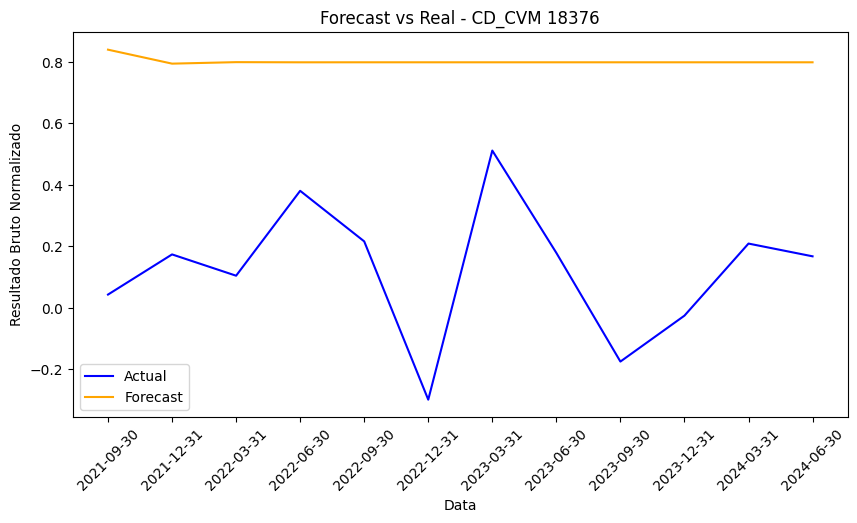

RMSE para CD_CVM 18376: 0.710585752861626


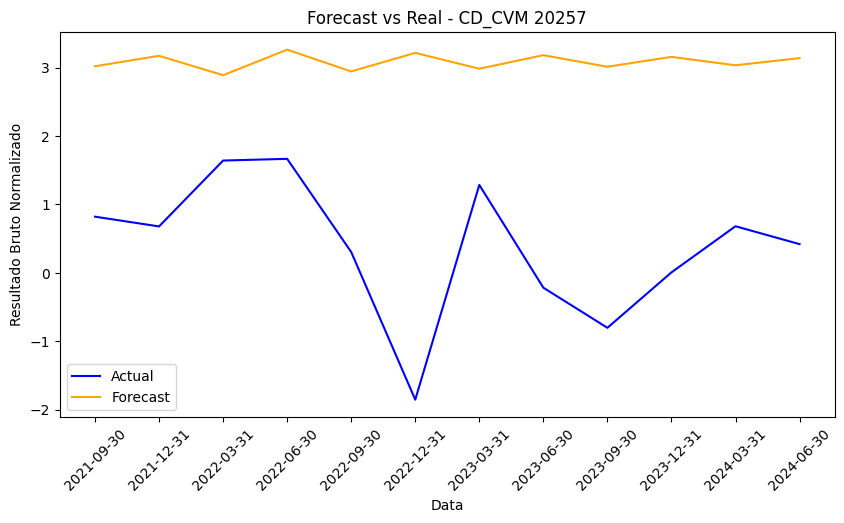

RMSE para CD_CVM 20257: 2.883645667232225


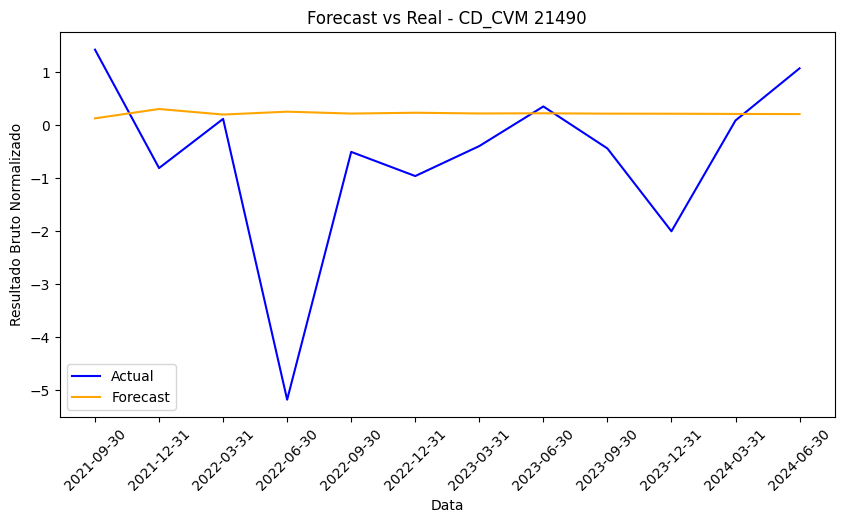

RMSE para CD_CVM 21490: 1.8430084157704456
[{'CD_CVM': 2437, 'RMSE': 0.441052620160528, 'MAE': 0.3738396714403846}, {'CD_CVM': 18376, 'RMSE': 0.710585752861626, 'MAE': 0.67787618988559}, {'CD_CVM': 20257, 'RMSE': 2.883645667232225, 'MAE': 2.699843458507766}, {'CD_CVM': 21490, 'RMSE': 1.8430084157704456, 'MAE': 1.201881440847028}]


In [127]:
resultado_bruto_metrics = aplica_modelo_forecast(result_bruto_arima, resultado_bruto_normalizado, exog_dict=[])
lucro_consolidado_metrics = aplica_modelo_forecast(lucro_consolidado_arima, lucro_consolidado_normalizado, exog_dict=[])
despesas_operacionais_metrics = aplica_modelo_forecast(despesas_operacionais_arima, despesas_operacionais_normalizado, exog_dict=[])

In [128]:
# Cria uma lista de dicionários com os valores de AIC e BIC para cada cd_cvm -> RESULTADO BRUTO
performance = []
for cd_cvm, modelo in result_bruto_arima.items():
    performance.append({
        'CD_CVM': cd_cvm,
        'AIC': modelo.aic,
        'BIC': modelo.bic
    })

# Cria o DataFrame e define CD_CVM como índice
df_performance_resul_bruto = pd.DataFrame(performance).set_index('CD_CVM')

# Ordena o DataFrame pelo AIC (menor é melhor)
df_performance_resul_bruto = df_performance_resul_bruto.sort_values(by='AIC')
df_combined_result = df_performance_resul_bruto.join(resultado_bruto_metrics)
print(df_combined_result.sort_values(by='CD_CVM'))

               AIC         BIC      RMSE       MAE
CD_CVM                                            
2437    147.405548  152.825535  0.282608  0.207246
18376   141.846651  147.266639  0.782388  0.749089
20257    80.677931   91.517906  1.266276  1.154356
21490    70.462649   83.109286  1.472701  1.411238


In [129]:
# Cria uma lista de dicionários com os valores de AIC e BIC para cada cd_cvm -> LUCRO CONSOLIDADO
performance = []
for cd_cvm, modelo in lucro_consolidado_arima.items():
    performance.append({
        'CD_CVM': cd_cvm,
        'AIC': modelo.aic,
        'BIC': modelo.bic
    })

# Cria o DataFrame e define CD_CVM como índice
df_performance_lucro = pd.DataFrame(performance).set_index('CD_CVM')

# Ordena o DataFrame pelo AIC (menor é melhor)
df_performance_lucro = df_performance_lucro.sort_values(by='AIC')
df_combined_lucro = df_performance_lucro.join(lucro_consolidado_metrics)
print(df_combined_lucro.sort_values(by='CD_CVM'))

               AIC         BIC      RMSE       MAE
CD_CVM                                            
2437    146.184117  151.604104  0.288014  0.231583
18376   144.601360  150.021347  0.257893  0.201386
20257   108.344564  119.184539  2.257791  2.077073
21490   109.390691  122.037328  2.568286  2.329796


In [130]:
# Cria uma lista de dicionários com os valores de AIC e BIC para cada cd_cvm -> DESPESAS OPERACIONAIS
performance = []
for cd_cvm, modelo in lucro_consolidado_arima.items():
    performance.append({
        'CD_CVM': cd_cvm,
        'AIC': modelo.aic,
        'BIC': modelo.bic
    })

# Cria o DataFrame e define CD_CVM como índice
df_performance_despesas = pd.DataFrame(performance).set_index('CD_CVM')

# Ordena o DataFrame pelo AIC (menor é melhor)
df_performance_despesas = df_performance_despesas.sort_values(by='AIC')
df_combined_despesas = df_performance_despesas.join(despesas_operacionais_metrics)
print(df_combined_despesas.sort_values(by='CD_CVM'))

               AIC         BIC      RMSE       MAE
CD_CVM                                            
2437    146.184117  151.604104  0.441053  0.373840
18376   144.601360  150.021347  0.710586  0.677876
20257   108.344564  119.184539  2.883646  2.699843
21490   109.390691  122.037328  1.843008  1.201881


In [131]:
def calcula_naive_metrics(df_indicadores_norm):
    """
    Calcula forecast naive e as métricas RMSE/MAE para cada coluna de um DataFrame de séries temporais normalizadas.
    
    Parâmetros:
        df_indicadores_norm: DataFrame (índice = datas, colunas = indicadores ou empresas)
        
    Retorna:
        naive_forecast_df: DataFrame com as previsões naive
        df_naive_metrics: DataFrame com RMSE e MAE para cada coluna
    """
    naive_forecast_results = {}

    for col in df_indicadores_norm.columns:
        series = df_indicadores_norm[col]
        n = len(series)
        split_point = int(n * 0.8)
        train = series.iloc[:split_point]
        test = series.iloc[split_point:]
        forecast = pd.Series(train.iloc[-1], index=test.index)
        naive_forecast_results[col] = forecast

    naive_forecast_df = pd.DataFrame(naive_forecast_results)

    naive_metrics = []
    for col in df_indicadores_norm.columns:
        actual = df_indicadores_norm[col]
        forecast = naive_forecast_df[col]
        rmse = np.sqrt(np.mean((actual - forecast) ** 2))
        mae = np.mean(np.abs(actual - forecast))
        naive_metrics.append({'Indicador': col, 'RMSE': rmse, 'MAE': mae})

    df_naive_metrics = pd.DataFrame(naive_metrics).set_index('Indicador')
    return naive_forecast_df, df_naive_metrics

In [132]:
naive_forecast_result, df_naive_metrics_result = calcula_naive_metrics(resultado_bruto_normalizado)
naive_forecast_lucro, df_naive_metrics_lucro = calcula_naive_metrics(lucro_consolidado_normalizado)
naive_forecast_despesas, df_naive_metrics_despesas = calcula_naive_metrics(despesas_operacionais_normalizado)

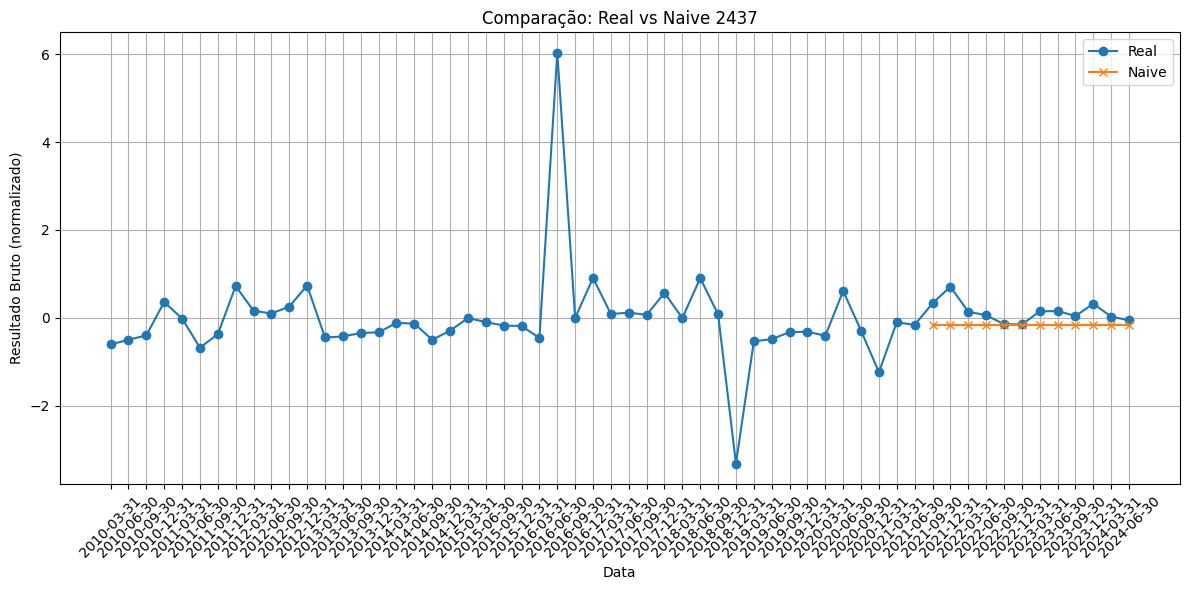

In [126]:
import matplotlib.pyplot as plt

# Plotando RMSE do ARIMA (normal) vs Naive
plt.figure(figsize=(12, 6))
plt.plot(resultado_bruto_normalizado[2437], label='Real', marker='o')
plt.plot(naive_forecast_result[2437], label='Naive', marker='x')
plt.title(f'Comparação: Real vs Naive {2437}')
plt.xlabel('Data')
plt.ylabel('Resultado Bruto (normalizado)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [133]:
# Função para adicionar as métricas Naive e melhorias em qualquer DataFrame combinado
def adiciona_metricas_naive(df_combined, df_naive_metrics):
    df_combined = df_combined.copy()
    df_combined['Naive RMSE'] = df_naive_metrics['RMSE']
    df_combined['Naive MAE'] = df_naive_metrics['MAE']
    df_combined['RMSE Improvement (%)'] = ((df_combined['Naive RMSE'] - df_combined['RMSE']) / df_combined['Naive RMSE']) * 100
    df_combined['MAE Improvement (%)'] = ((df_combined['Naive MAE'] - df_combined['MAE']) / df_combined['Naive MAE']) * 100
    return df_combined

# Aplicando para cada tabela
df_combined_result_final = adiciona_metricas_naive(df_combined_result, df_naive_metrics_result)
df_combined_lucro_final = adiciona_metricas_naive(df_combined_lucro, df_naive_metrics_lucro)
df_combined_despesas_final = adiciona_metricas_naive(df_combined_despesas, df_naive_metrics_despesas)

# Exibir as tabelas separadas
print("Resultado Bruto:")
display(df_combined_result_final.sort_values(by='CD_CVM'))
print("Lucro Consolidado:")
display(df_combined_lucro_final.sort_values(by='CD_CVM'))
print("Despesas Operacionais:")
display(df_combined_despesas_final.sort_values(by='CD_CVM'))

Resultado Bruto:


,AIC,BIC,RMSE,MAE,Naive RMSE,Naive MAE,RMSE Improvement (%),MAE Improvement (%)
CD_CVM,,,,,,,,
2437,147.405548,152.825535,0.282608,0.207246,0.371516,0.293264,23.931296,29.331253
18376,141.846651,147.266639,0.782388,0.749089,0.226117,0.174732,-246.010462,-328.707916
20257,80.677931,91.517906,1.266276,1.154356,0.907763,0.752366,-39.494211,-53.430101
21490,70.462649,83.109286,1.472701,1.411238,0.954347,0.844288,-54.315062,-67.151358


Lucro Consolidado:


,AIC,BIC,RMSE,MAE,Naive RMSE,Naive MAE,RMSE Improvement (%),MAE Improvement (%)
CD_CVM,,,,,,,,
2437,146.184117,151.604104,0.288014,0.231583,0.479913,0.431085,39.986290,46.279150
18376,144.601360,150.021347,0.257893,0.201386,0.387479,0.349163,33.443466,42.323176
20257,108.344564,119.184539,2.257791,2.077073,1.960655,1.771885,-15.154927,-17.223921
21490,109.390691,122.037328,2.568286,2.329796,1.783979,1.693173,-43.963932,-37.599391


Despesas Operacionais:


,AIC,BIC,RMSE,MAE,Naive RMSE,Naive MAE,RMSE Improvement (%),MAE Improvement (%)
CD_CVM,,,,,,,,
2437,146.184117,151.604104,0.441053,0.373840,0.420336,0.366259,-4.928522,-2.069866
18376,144.601360,150.021347,0.710586,0.677876,0.359381,0.306805,-97.724829,-120.946774
20257,108.344564,119.184539,2.883646,2.699843,2.447114,2.245619,-17.838624,-20.227152
21490,109.390691,122.037328,1.843008,1.201881,1.938144,1.315494,4.908616,8.636513


# ARIMA
Arima implica que a série temporal seja estacionária (média, variância e autocovariância constantes ao longo do tempo)

## ARIMAX

In [135]:
dados_indices.info()
#exluir as 4 últimas linhas do dataframe entradas, estão como NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 48 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   data                                                                                                                        59 non-null     object 
 1   ibov                                                                                                                        59 non-null     float64
 2   iee                                                                                                                         59 non-null     float64
 3   selic                                                                                                                       59 

In [146]:
#Dict com cd_cvm como chave e dataframe com os indicadores como valor
dict_indicadores = {}
for cd_cvm in dados_indicadores_transm['CD_CVM'].unique():
    df_temp = dados_indicadores_transm.copy()
    df_temp = df_temp[df_temp['CD_CVM'] == cd_cvm].copy()
    
    df_temp.drop(columns=['CD_CVM','DENOM_CIA'], inplace=True)
    df_temp.set_index('DT_FIM_EXERC', inplace=True)
    dict_indicadores[cd_cvm] = df_temp
dict_indicadores[2437]


,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11
DT_FIM_EXERC,,,,,,,,,,,
2010-03-31,6.159172e+09,-9.600600e+08,5.199112e+09,-4.861068e+09,3.380440e+08,3.259800e+08,6.640240e+08,-4.728970e+08,1.911270e+08,0.000000e+00,1.911270e+08
2010-06-30,6.585996e+09,0.000000e+00,6.585996e+09,-4.822674e+09,1.763322e+09,1.004120e+08,1.863734e+09,-4.716370e+08,1.392097e+09,0.000000e+00,1.392097e+09
2010-09-30,6.999764e+09,0.000000e+00,6.999764e+09,-6.074098e+09,9.256660e+08,-3.447170e+08,5.809490e+08,-4.175490e+08,1.634000e+08,0.000000e+00,1.634000e+08
2010-12-31,1.006972e+10,-3.322324e+09,6.747396e+09,-5.363056e+09,1.384340e+09,-4.457970e+08,9.385430e+08,-1.321820e+08,8.063610e+08,0.000000e+00,8.063610e+08
2011-03-31,8.551982e+09,-1.127021e+09,7.424961e+09,-5.281346e+09,2.143615e+09,-2.760700e+08,1.867545e+09,-5.786970e+08,1.288848e+09,0.000000e+00,1.288848e+09
2011-06-30,5.867031e+09,0.000000e+00,5.867031e+09,-4.929233e+09,9.377980e+08,-6.886860e+08,2.491120e+08,9.797400e+07,3.470860e+08,0.000000e+00,3.470860e+08
2011-09-30,7.097198e+09,0.000000e+00,7.097198e+09,-6.356726e+09,7.404720e+08,1.528143e+09,2.268615e+09,-7.101730e+08,1.558442e+09,0.000000e+00,1.558442e+09
2011-12-31,1.154514e+10,-3.588726e+09,7.956419e+09,-7.152677e+09,8.037420e+08,-3.289340e+08,4.748080e+08,9.283500e+07,5.676430e+08,0.000000e+00,5.676430e+08
2012-03-31,9.270930e+09,-1.288167e+09,7.982763e+09,-5.674886e+09,2.307877e+09,-3.382880e+08,1.969589e+09,-6.971210e+08,1.272468e+09,0.000000e+00,1.272468e+09


In [156]:
dados_indicadores_transm

,CD_CVM,DENOM_CIA,DT_FIM_EXERC,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11
496,2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2010-03-31,6.159172e+09,-9.600600e+08,5.199112e+09,-4.861068e+09,3.380440e+08,325980000.0,6.640240e+08,-472897000.0,1.911270e+08,0.0,1.911270e+08
497,2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2010-06-30,6.585996e+09,0.000000e+00,6.585996e+09,-4.822674e+09,1.763322e+09,100412000.0,1.863734e+09,-471637000.0,1.392097e+09,0.0,1.392097e+09
498,2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2010-09-30,6.999764e+09,0.000000e+00,6.999764e+09,-6.074098e+09,9.256660e+08,-344717000.0,5.809490e+08,-417549000.0,1.634000e+08,0.0,1.634000e+08
499,2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2010-12-31,1.006972e+10,-3.322324e+09,6.747396e+09,-5.363056e+09,1.384340e+09,-445797000.0,9.385430e+08,-132182000.0,8.063610e+08,0.0,8.063610e+08
500,2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2011-03-31,8.551982e+09,-1.127021e+09,7.424961e+09,-5.281346e+09,2.143615e+09,-276070000.0,1.867545e+09,-578697000.0,1.288848e+09,0.0,1.288848e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14349,21490,ALUPAR INVESTIMENTO S/A,2023-09-30,6.489570e+08,-2.011590e+08,4.477980e+08,-3.363500e+07,4.141630e+08,-214187000.0,1.999760e+08,-32784000.0,1.671920e+08,0.0,1.671920e+08
14350,21490,ALUPAR INVESTIMENTO S/A,2023-12-31,8.782710e+08,-2.300920e+08,6.481790e+08,-7.970100e+07,5.684780e+08,-183850000.0,3.846280e+08,-126259000.0,2.583690e+08,0.0,2.583690e+08
14351,21490,ALUPAR INVESTIMENTO S/A,2024-03-31,9.965350e+08,-2.095290e+08,7.870060e+08,-1.807700e+07,7.689290e+08,-253881000.0,5.150480e+08,-112210000.0,4.028380e+08,0.0,4.028380e+08
14352,21490,ALUPAR INVESTIMENTO S/A,2024-06-30,9.536920e+08,-2.229270e+08,7.307650e+08,1.092500e+07,7.416900e+08,-234082000.0,5.076080e+08,-114191000.0,3.934170e+08,0.0,3.934170e+08


In [157]:
#adicionar lags aos indicadores        
df_lags_indicadores = adicionar_lags(dict_indicadores[cd_cvm], lags=4)
df_lags_indicadores = df_lags_indicadores.iloc[4:] 

#adicionar lags às entradas
df_lags_entradas = adicionar_lags(indices_norm, lags=4)
df_lags_entradas = df_lags_entradas.iloc[4:]
df_lags_entradas.set_index('data', inplace=True)

exog_vars = pd.concat([df_lags_indicadores, df_lags_entradas], axis=1)

In [163]:
dict_indicadores[cd_cvm]

,3.01,3.02,3.03,3.04,3.05,3.06,3.07,3.08,3.09,3.10,3.11
DT_FIM_EXERC,,,,,,,,,,,
2010-03-31,2.820830e+08,-109982000.0,1.721010e+08,-14640000.0,1.574610e+08,-29583000.0,1.278780e+08,-20418000.0,1.074600e+08,0.0,1.074600e+08
2010-09-30,2.681520e+08,-91704000.0,1.764480e+08,-5616000.0,1.708320e+08,-27612000.0,1.432200e+08,-22458000.0,1.207620e+08,0.0,1.207620e+08
2010-12-31,3.854960e+08,-42203000.0,3.432930e+08,-17188000.0,3.261050e+08,-76033000.0,2.500720e+08,-56868000.0,1.932040e+08,0.0,1.932040e+08
2011-03-31,2.933890e+08,-94234000.0,1.991550e+08,-11628000.0,1.875270e+08,-34444000.0,1.530830e+08,-19058000.0,1.340250e+08,0.0,1.340250e+08
2011-09-30,3.222410e+08,-104842000.0,2.173990e+08,-22989000.0,1.944100e+08,-54647000.0,1.397630e+08,-24607000.0,1.151560e+08,0.0,1.151560e+08
2011-12-31,5.980150e+08,-173975000.0,4.240400e+08,-67577000.0,3.564630e+08,-110532000.0,2.459310e+08,-56068000.0,1.898630e+08,0.0,1.898630e+08
2012-03-31,2.962510e+08,-51254000.0,2.449970e+08,-25524000.0,2.194730e+08,-54361000.0,1.651120e+08,-23579000.0,1.415330e+08,0.0,1.415330e+08
2012-06-30,3.252600e+08,-84140000.0,2.411200e+08,-27316000.0,2.138040e+08,-55707000.0,1.580970e+08,-29390000.0,1.287070e+08,0.0,1.287070e+08
2012-09-30,3.069000e+08,-47980000.0,2.589200e+08,-23890000.0,2.350300e+08,-67927000.0,1.671030e+08,-34812000.0,1.322910e+08,0.0,1.322910e+08


In [ ]:
exog